# Time series analysis of the average temperature in Cincinnati

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller

In [56]:
# Importing the Datasets
Citytemp = pd.read_csv('Data/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'], index_col='dt')
GlobalLandTemperatureByMajorCity = pd.read_csv('Data/GlobalLandTemperaturesByMajorCity.csv')
GlobalLandTemperaturesByCountry = pd.read_csv('Data/GlobalLandTemperaturesByCountry.csv')
GlobalLandTemperaturesByState = pd.read_csv('Data/GlobalLandTemperaturesByState.csv')
GlobalTemperatures = pd.read_csv('Data/GlobalTemperatures.csv')

In [58]:
# Time series analysis on the temperature values for only Cincinnati
Citytemp_cincy = Citytemp.copy()
Citytemp_cincy = Citytemp_cincy.loc[Citytemp['City'] == 'Cincinnati']

# Dropping the following columns
CityDrop = ['Latitude',
           'Longitude',
           'AverageTemperatureUncertainty',
           'Country']
Citytemp_cincy.drop(CityDrop, inplace=True, axis=1)

# Dropping all NaN Values
Citytemp_cincy = Citytemp_cincy.dropna()

Citytemp_cincy.reset_index(inplace=True)

In [59]:
Citytemp_cincy.tail(10)

,dt,AverageTemperature,City
3109,2012-12-01,4.187,Cincinnati
3110,2013-01-01,-0.254,Cincinnati
3111,2013-02-01,-0.305,Cincinnati
3112,2013-03-01,2.287,Cincinnati
3113,2013-04-01,11.409,Cincinnati
3114,2013-05-01,18.813,Cincinnati
3115,2013-06-01,22.384,Cincinnati
3116,2013-07-01,23.183,Cincinnati
3117,2013-08-01,22.671,Cincinnati
3118,2013-09-01,20.397,Cincinnati


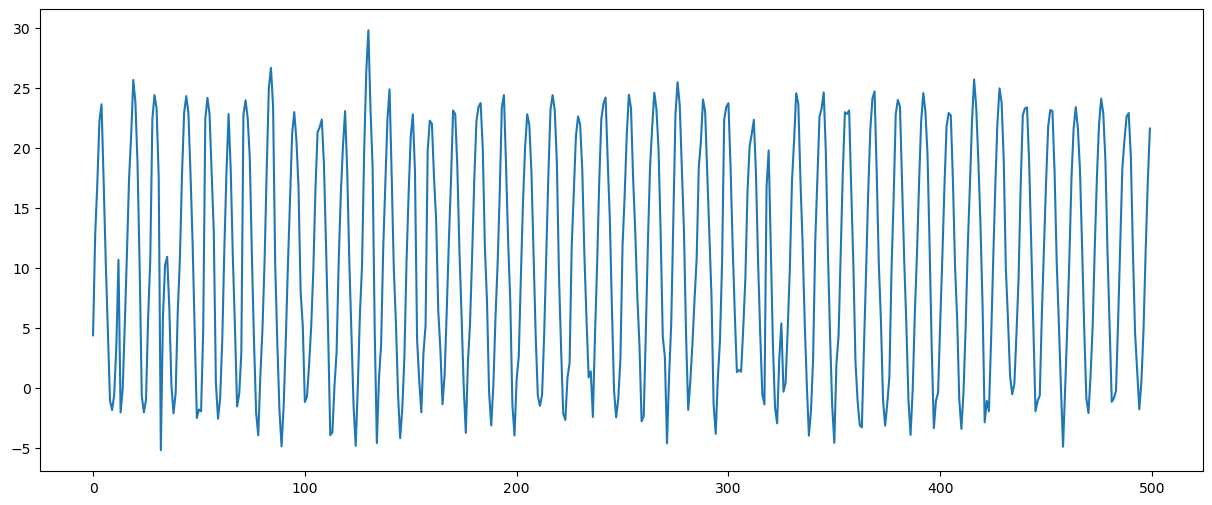

In [63]:
plt.rcParams.update({'figure.figsize': (15,6)})
plt.plot(Citytemp_cincy.head(500)['AverageTemperature'])

In [64]:
# There is not a clear trend here, but the magnitude accross time seems to be fairly consistent.
# Because the magnitude seems consistent, and there are negative values, we will use an additive decomposition model.

In [65]:
# Additive Decomposition
add_result = seasonal_decompose(Citytemp_cincy.head(500)['AverageTemperature'] ,model='additive', period=1)

Text(0.5, 0.98, '\nAdditive Decomposition')

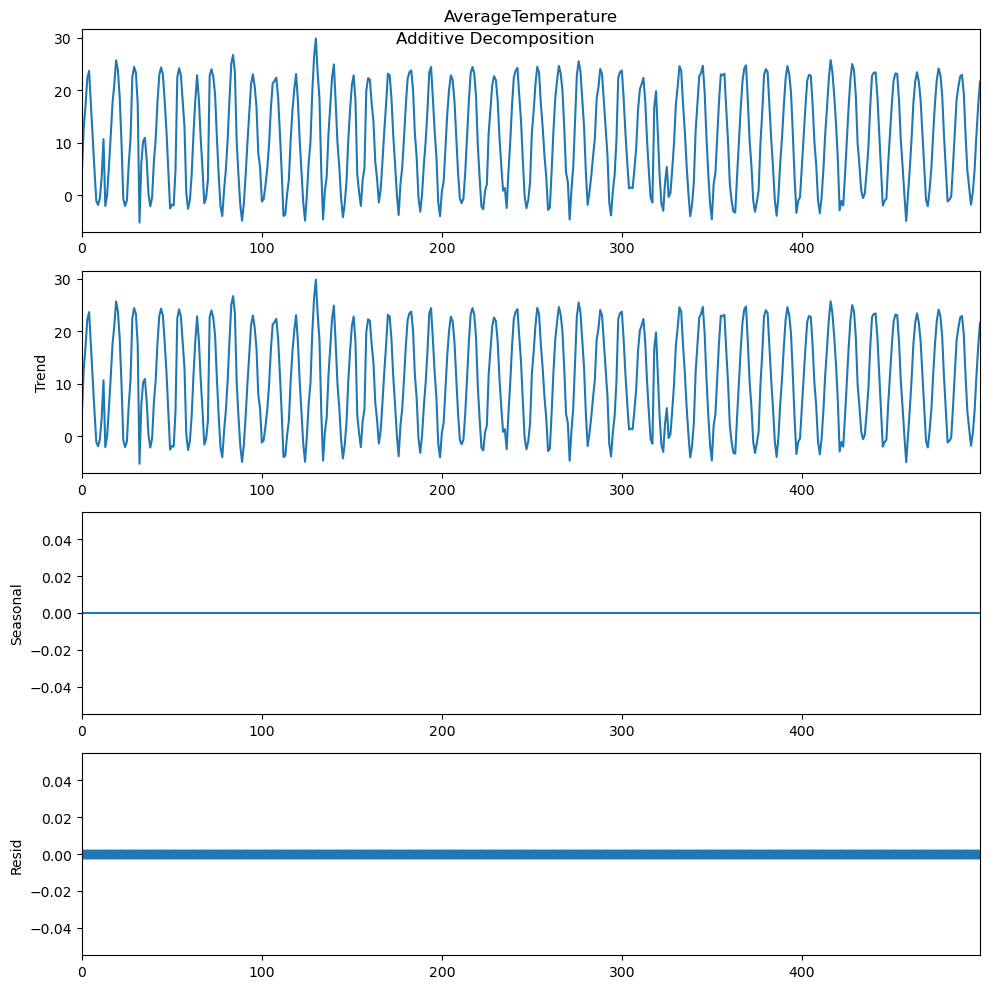

In [66]:
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle('\nAdditive Decomposition', fontsize=12)

In [67]:
# Creating a new dataframe with the result values from the additive composition
add_result_df = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
add_result_df.columns = ['seasonality', 'trend', 'residual', 'actual_values']
add_result_df.head(10)

,seasonality,trend,residual,actual_values
0,0.0,4.373,0.0,4.373
1,0.0,12.745,0.0,12.745
2,0.0,17.004,0.0,17.004
3,0.0,22.267,0.0,22.267
4,0.0,23.653,0.0,23.653
5,0.0,17.213,0.0,17.213
6,0.0,10.430,0.0,10.430
7,0.0,4.681,0.0,4.681
8,0.0,-1.088,0.0,-1.088
9,0.0,-1.872,0.0,-1.872


In [68]:
# From the additive composition we can see that the trend values and the actual values are equivalent, and the seasonality 
# and residual are both 0 as this is an additive model.

#  Now we must check to see if the model is stationary, and to do so we are going to use the ADF (Augmented Dickey-Fuller) test

In [69]:
# With an ADF test the null hypothesis is that the model is non-stationary
# testing with alpha = 0.05

adfuller_result = adfuller(Citytemp_cincy.AverageTemperature.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critical Values: ')
    print(f' {key} ,{value}')

ADF Statistic: -6.257255527244281
p-value: 4.308659014294718e-08
Critical Values: 
 1% ,-3.4324687252980604
Critical Values: 
 5% ,-2.862476120060324
Critical Values: 
 10% ,-2.5672683196360566


In [ ]:
# Because the resulting p-value from the ADF statistic is less than alpha = 0.05, we can reject the null hypothesis and 
# conclude that this time series model is stationary